# Advanced Feature Engineering
<hr style="border:2px solid black">

## 1. Example: Titanic Data

**load packages**

In [123]:
# data analysis stack
import numpy as np
import pandas as pd

# machine-learning stack
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

**read data**

In [124]:
df = pd.read_csv('../data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.1 Train-Test split

In [125]:
train,test = train_test_split(df, test_size=0.2, random_state=101)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

### 2.2 Quick exploration

In [126]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.00,NaN,S
1,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.55,E17,S
2,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.50,NaN,S
3,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.50,E34,C
4,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.00,NaN,S


In [127]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          577 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        157 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.9+ KB


### 2.3 Feature-Target Separation

In [128]:
num_features = [
    'SibSp',
    'Pclass',
    'Age',
    'Fare'
]

cat_features = ['Sex',  
                #'Name', 
                #'Cabin',
                'Embarked']

features = num_features + cat_features

target = 'Survived'

# feature and target columns
X_train,y_train = train[features], train[target]

In [129]:
X_train.head()

,SibSp,Pclass,Age,Fare,Sex,Embarked
0,0,2,23.0,13.00,male,S
1,0,1,51.0,26.55,male,S
2,0,3,29.0,9.50,male,S
3,1,1,40.0,134.50,female,C
4,0,2,6.0,33.00,female,S


In [130]:
y_train

0      0
1      1
2      1
3      1
4      1
      ..
707    0
708    1
709    1
710    1
711    0
Name: Survived, Length: 712, dtype: int64

### 2.3 Feature Engineering

**numerical columns**

In [131]:
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaling', StandardScaler()),
    ])

**categorical columns**

In [132]:
# column transformation
cat_transformer = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(drop='first'))
    ])

**total preprocessing**

In [133]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_transformer', num_transformer, num_features),
        ('cat_transformer', cat_transformer, cat_features)
    ])

### 2.4 Model Building

**instantiate model**

In [134]:
classifier_model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ])

**train model**

In [135]:
classifier_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['SibSp', 'Pclass', 'Age',
                                                   'Fare']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression())])

**model validation**

In [136]:
training_acccuracy = classifier_model.score(X_train,y_train)
print(f"training accuracy: {round(training_acccuracy, 6)}")

training accuracy: 0.801966


### 2.5 Model Evaluation

**feature-target separation**

**model performance**

In [137]:
X_test, y_test = test[features], test[target]
X_test

,SibSp,Pclass,Age,Fare,Sex,Embarked
0,0,1,45.5,28.5000,male,S
1,1,1,18.0,227.5250,female,C
2,1,1,19.0,53.1000,male,S
3,0,3,6.0,12.4750,male,S
4,0,2,NaN,0.0000,male,S
...,...,...,...,...,...,...
174,0,3,NaN,7.3125,male,S
175,0,3,NaN,8.0500,male,S
176,0,1,56.0,83.1583,female,C
177,0,3,48.0,7.8542,male,S


In [138]:
classifier_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['SibSp', 'Pclass', 'Age',
                                                   'Fare']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression())])

In [139]:
test_acccuracy = classifier_model.score(X_test,y_test)
print(f"test accuracy: {round(test_acccuracy, 6)}")


test accuracy: 0.810056


In [140]:

from scipy import sparse as sp

<hr style="border:2px solid black">

## 3. Extra Challenge

### 3.1 Custom Imputer

In [141]:
def title_norm(str_t) -> int:
    '''
    Function does the following transformations:
    ['mrs','mr','miss','master','dr','rev'] remain the same
    ['mlle','ms'] become 'miss'
    'mme' becomes 'mrs'
    ['col','major','capt'] become 'army'
    ['don','lady','the countess','sir','the count','madam','lord'] become 'nobl'
    other titles become 'unknown'
    '''
    title_name = { 1 : ['mlle','ms', 'miss'],
                   2 : ['mme', 'mrs'], 
                   3 : ['mr'],
                   4 : ['col','major','capt', 'army'],
                   5 : ['don','lady','the countess','sir','the count','madam','lord', 'nobl'],
                   6 : ['master'],
                   7 : ['dr'],
                   8 : ['rev'],
    }

    for item in title_name:
        if str_t in title_name[item]:
           
            return item
        
    return 0


In [142]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

In [143]:
class CatergoryImputer(BaseEstimator, TransformerMixin):
    '''
    Parameters
    ----------    
    group_cols : list
        List of columns used for calculating the aggregated value 
    target : str
        The name of the column to impute
    metric : str
        The metric to be used for remplacement, can be one of ['name', 'cabin']
    Returns
    -------
    X : array-like
        The array with imputed values in the target column
    '''
    def __init__(self, group_cols, target, metric='count'):
        
        #assert metric in ['max', 'min', 'count'], 'Unrecognized value for metric, should be mean/median'
        assert type(group_cols) == list, 'group_cols should be a list of columns'
        assert type(target) == str, 'target should be a string'
        
        self.group_cols = group_cols
        self.target = target
        self.metric = metric
    
    def fit(self, X, y=None):
       
       # print(X[self.group_cols])
       # assert pd.isnull(X[self.group_cols]).any(axis=1) == False, 'There are missing values in group_cols'
       # print('Ok')
        #impute_map = X[self.group_cols]
       # X.groupby(self.group_cols)[self.target].agg(self.metric).reset_index(drop=False)
        
        #self.impute_map_ = impute_map
        
       return self 

    
    def transform(self, X, y=None):
        
        # make sure that the imputer was fitted
       # check_is_fitted(self, 'impute_map_')
        
      #  X = X.copy()
      #  X['title'] = X[self.group_cols].apply(lambda x: x.split(',')[1].split('.')[0].lower().strip()) 
      #  X[self.group_cols] = X['title'].apply(title_norm

        return X[self.group_cols]


In [144]:

class CategoryMaker(BaseEstimator, TransformerMixin): 
    
    def __init__(self):
        
        print('\n>>>>>>>Categor init() called.\n')

    def fit(self, X, y = None):

        print('\n>>>>>>>Categor fit() called.\n')
        return self

    def transform(self, X, y = None):
        
        X_ = X.copy() # creating a copy to avoid changes to original dataset
        X_.Name = X.Name.apply(lambda x: x.split(',')[1].split('.')[0].lower().strip()) 
        X_.Name = X_.Name.apply(title_norm)
        print('\n>>>>>>>Categor transform() called.',  X_.Name)
        return X_
        

In [145]:
class ColumnsSelector(BaseEstimator, TransformerMixin):
    # initializer 
    def __init__(self, columns):
        # save the features list internally in the class
        self.columns = columns
        
    def fit(self, X, y = None):
        return self    
    
    def transform(self, X, y = None):
        # return the dataframe with the specified features
        return X[self.columns]
    

class FareScaler(BaseEstimator, TransformerMixin): 
    def __init__(self):
        print('\n>>>>>>>Numeric init() called.\n')

    def fit(self, X, y = None):
        print('\n>>>>>>>Numeric fit() called.\n')
        return self

    def transform(self, X, y = None):
        
        X_ = X.copy() # creating a copy to avoid changes to original dataset
        X_.Fare = (X_.Fare)/(X_.SibSp + 1 + X_.Parch)
        print('\n>>>>>>>Numeric transform() called.\n', X_)
        return X_
     

### 3.1 Feature Engineering

In [146]:
num_features = [
    'SibSp',
    'Pclass',
    'Age',
    'Fare',
    'Parch'
]

cat_features = ['Sex',  
                'Name', 
               # 'Cabin',
                'Embarked']

features = num_features + cat_features

target = 'Survived'

# feature and target columns
X_train,y_train = train[features], train[target]

**numerical columns**

In [147]:
eng_transformer = Pipeline(
    steps=[
        ('scale_fare', FareScaler()),
        ('imputer', SimpleImputer(strategy='median')),
       
])


>>>>>>>Numeric init() called.



In [148]:
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaling', StandardScaler()),
    ])

**categorical columns**

In [149]:
# column transformation
cat_transformer = Pipeline(
    steps=[
        ('reorder', CategoryMaker()),
        ('onehot', OneHotEncoder(drop='first')),
        ('imputer', SimpleImputer(strategy='most_frequent')),
    ]
)


>>>>>>>Categor init() called.



**total preprocessing**

In [150]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_transformer', num_transformer, num_features),
        ('eng_transformer', eng_transformer, num_features),
        ('cat_transformer', cat_transformer, cat_features)
    ])

### 3.2 Model Building

In [151]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier

from IPython.display import IFrame
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

**instantiate model**

In [152]:
classifier_model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier',  CatBoostClassifier(random_state=12, depth=4, iterations=90))    
       # ('classifier',  LogisticRegression())   
        #('classifier',  RandomForest (max_depth=20,  n_estimators=200))   
    ])




**train model**

In [153]:
rfc = classifier_model.fit(X_train, y_train)


>>>>>>>Numeric init() called.


>>>>>>>Numeric fit() called.


>>>>>>>Numeric transform() called.
      SibSp  Pclass   Age        Fare  Parch
0        0       2  23.0   13.000000      0
1        0       1  51.0   26.550000      0
2        0       3  29.0    9.500000      0
3        1       1  40.0   44.833333      1
4        0       2   6.0   16.500000      1
..     ...     ...   ...         ...    ...
707      0       3  19.0   14.500000      0
708      0       3  32.0   56.495800      0
709      0       1  41.0  134.500000      0
710      0       1  44.0   28.989600      1
711      8       3   NaN    6.322727      2

[712 rows x 5 columns]

>>>>>>>Categor init() called.


>>>>>>>Categor fit() called.


>>>>>>>Categor transform() called. 0      3
1      3
2      3
3      2
4      1
      ..
707    3
708    3
709    1
710    2
711    1
Name: Name, Length: 712, dtype: int64
Learning rate set to 0.081078
0:	learn: 0.6477167	total: 29.3ms	remaining: 2.61s
1:	learn: 0.6164458	total: 30.1

**model validation**

In [154]:

training_acccuracy = rfc.score(X_train,y_train)
print(f"training accuracy: {round(training_acccuracy, 6)}")


>>>>>>>Numeric transform() called.
      SibSp  Pclass   Age        Fare  Parch
0        0       2  23.0   13.000000      0
1        0       1  51.0   26.550000      0
2        0       3  29.0    9.500000      0
3        1       1  40.0   44.833333      1
4        0       2   6.0   16.500000      1
..     ...     ...   ...         ...    ...
707      0       3  19.0   14.500000      0
708      0       3  32.0   56.495800      0
709      0       1  41.0  134.500000      0
710      0       1  44.0   28.989600      1
711      8       3   NaN    6.322727      2

[712 rows x 5 columns]

>>>>>>>Categor transform() called. 0      3
1      3
2      3
3      2
4      1
      ..
707    3
708    3
709    1
710    2
711    1
Name: Name, Length: 712, dtype: int64
training accuracy: 0.869382


### 2.5 Model Evaluation

**feature-target separation**

In [155]:
X_test, y_test = test[features], test[target]

**model performance**

In [156]:
test_acccuracy = classifier_model.score(X_test,y_test)
print(f"test accuracy: {round(test_acccuracy, 6)}")


>>>>>>>Numeric transform() called.
      SibSp  Pclass   Age       Fare  Parch
0        0       1  45.5   28.50000      0
1        1       1  18.0  113.76250      0
2        1       1  19.0   26.55000      0
3        0       3   6.0    6.23750      1
4        0       2   NaN    0.00000      0
..     ...     ...   ...        ...    ...
174      0       3   NaN    7.31250      0
175      0       3   NaN    8.05000      0
176      0       1  56.0   41.57915      1
177      0       3  48.0    7.85420      0
178      0       2   NaN    0.00000      0

[179 rows x 5 columns]

>>>>>>>Categor transform() called. 0      3
1      2
2      3
3      6
4      3
      ..
174    3
175    3
176    2
177    3
178    3
Name: Name, Length: 179, dtype: int64
test accuracy: 0.821229


In [157]:
X_test.info

<bound method DataFrame.info of      SibSp  Pclass   Age      Fare  Parch     Sex  \
0        0       1  45.5   28.5000      0    male   
1        1       1  18.0  227.5250      0  female   
2        1       1  19.0   53.1000      0    male   
3        0       3   6.0   12.4750      1    male   
4        0       2   NaN    0.0000      0    male   
..     ...     ...   ...       ...    ...     ...   
174      0       3   NaN    7.3125      0    male   
175      0       3   NaN    8.0500      0    male   
176      0       1  56.0   83.1583      1  female   
177      0       3  48.0    7.8542      0    male   
178      0       2   NaN    0.0000      0    male   

                                                  Name Embarked  
0                                  Partner, Mr. Austen        S  
1    Astor, Mrs. John Jacob (Madeleine Talmadge Force)        C  
2                            Marvin, Mr. Daniel Warner        S  
3                                  Moor, Master. Meier        S  
4

AttributeError: module 'seaborn' has no attribute 'show'

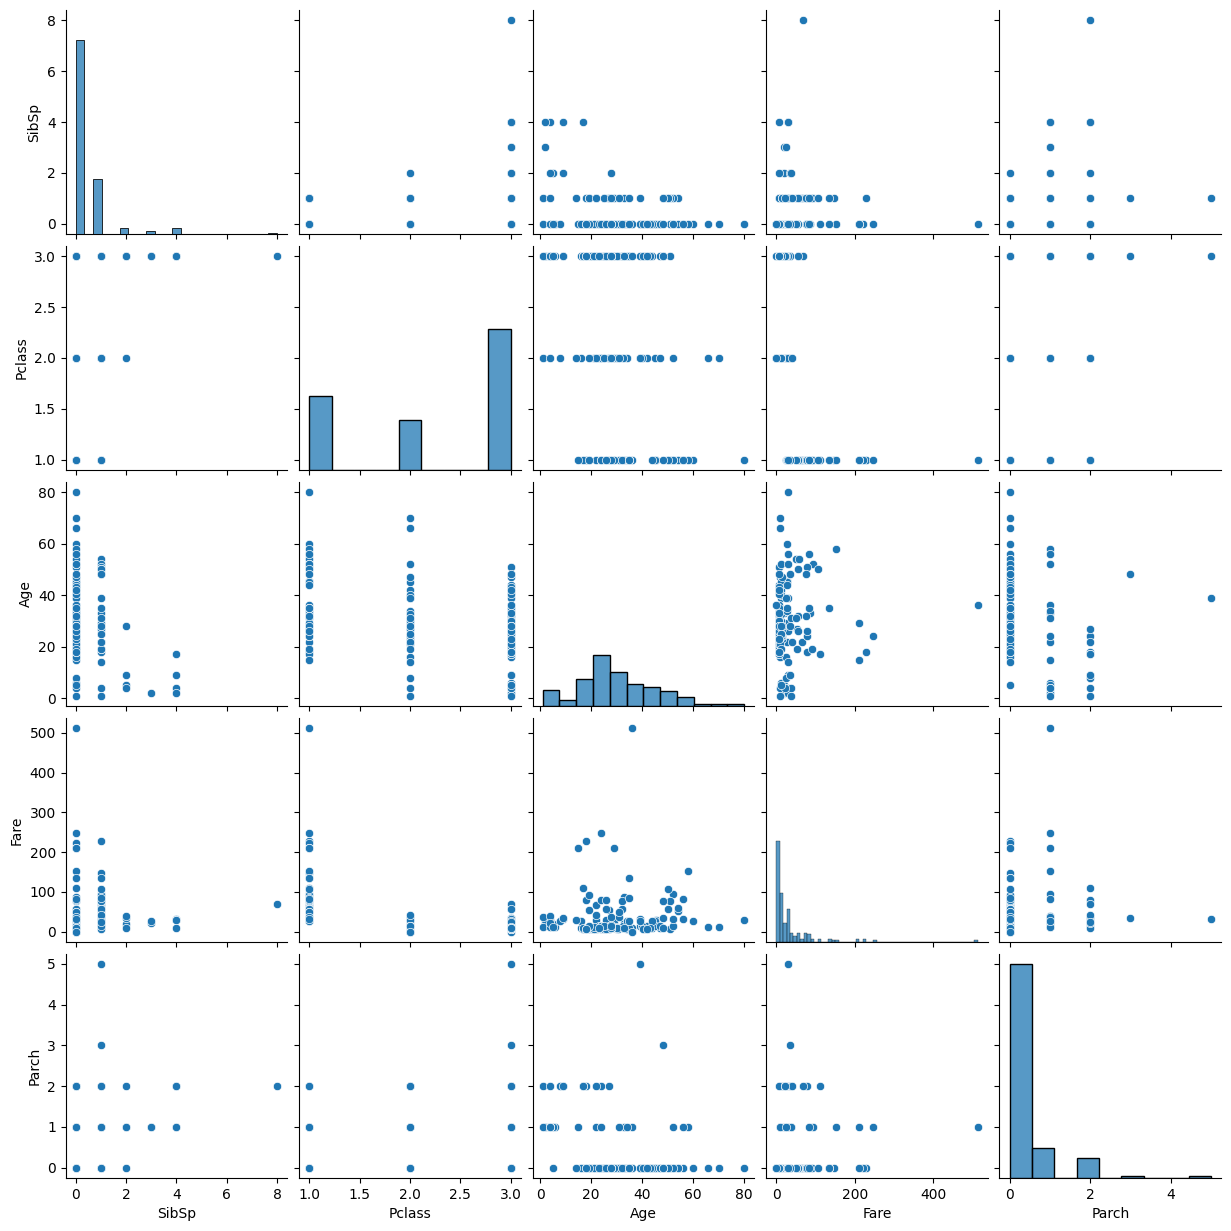

In [162]:
sns.pairplot(X_test)
sns.show()

In [112]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

classifier_model_DTC = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        #('classifier',  CatBoostClassifier(random_state=12, depth=4, iterations=90))    
        #('classifier',  LogisticRegression())   
        ('classifier',  DecisionTreeClassifier())   
    ])


In [113]:
dtc = classifier_model_DTC.fit(X_train, y_train)


>>>>>>>Numeric init() called.


>>>>>>>Numeric fit() called.


>>>>>>>Numeric transform() called.
      SibSp  Pclass   Age        Fare  Parch
0        0       2  23.0   13.000000      0
1        0       1  51.0   26.550000      0
2        0       3  29.0    9.500000      0
3        1       1  40.0   44.833333      1
4        0       2   6.0   16.500000      1
..     ...     ...   ...         ...    ...
707      0       3  19.0   14.500000      0
708      0       3  32.0   56.495800      0
709      0       1  41.0  134.500000      0
710      0       1  44.0   28.989600      1
711      8       3   NaN    6.322727      2

[712 rows x 5 columns]

>>>>>>>Categor init() called.


>>>>>>>Categor fit() called.


>>>>>>>Categor transform() called. 0      3
1      3
2      3
3      2
4      1
      ..
707    3
708    3
709    1
710    2
711    1
Name: Name, Length: 712, dtype: int64


In [111]:
dtc = classifier_model_DTC.fit(X_train, y_train)

print(f"test accuracy: {round(test_acccuracy, 6)}")


>>>>>>>Numeric init() called.


>>>>>>>Numeric fit() called.


>>>>>>>Numeric transform() called.
      SibSp  Pclass   Age        Fare  Parch
0        0       2  23.0   13.000000      0
1        0       1  51.0   26.550000      0
2        0       3  29.0    9.500000      0
3        1       1  40.0   44.833333      1
4        0       2   6.0   16.500000      1
..     ...     ...   ...         ...    ...
707      0       3  19.0   14.500000      0
708      0       3  32.0   56.495800      0
709      0       1  41.0  134.500000      0
710      0       1  44.0   28.989600      1
711      8       3   NaN    6.322727      2

[712 rows x 5 columns]

>>>>>>>Categor init() called.


>>>>>>>Categor fit() called.


>>>>>>>Categor transform() called. 0      3
1      3
2      3
3      2
4      1
      ..
707    3
708    3
709    1
710    2
711    1
Name: Name, Length: 712, dtype: int64
test accuracy: 0.810056


In [76]:
X_train

,SibSp,Pclass,Age,Fare,Parch,Sex,Name,Embarked
0,0,2,23.0,13.0000,0,male,"Berriman, Mr. William John",S
1,0,1,51.0,26.5500,0,male,"Daly, Mr. Peter Denis",S
2,0,3,29.0,9.5000,0,male,"Sheerlinck, Mr. Jan Baptist",S
3,1,1,40.0,134.5000,1,female,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",C
4,0,2,6.0,33.0000,1,female,"Harper, Miss. Annie Jessie ""Nina""",S
...,...,...,...,...,...,...,...,...
707,0,3,19.0,14.5000,0,male,"Patchett, Mr. George",S
708,0,3,32.0,56.4958,0,male,"Chip, Mr. Chang",S
709,0,1,41.0,134.5000,0,female,"Burns, Miss. Elizabeth Margaret",C
710,0,1,44.0,57.9792,1,female,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",C


In [77]:

from sklearn import tree
import graphviz

def print_graph(data):
    dot_data = tree.export_graphviz(data, out_file=None,
                                    feature_names= ['SibSp',	'Pclass',	'Age',	'Fare',	'Parch'],  
                                    class_names=cat_features,  
                                    filled=True)  
    return graphviz.Source(dot_data)  

print_graph(dtc)

ValueError: Length of feature_names, 5 does not match number of features, 8

<hr style="border:2px solid black">

## References

- [How to add feature engineering to a scikit-learn pipeline](https://practicaldatascience.co.uk/machine-learning/how-to-add-feature-engineering-to-a-scikit-learn-pipeline)

- [Coding a custom imputer in scikit-learn](https://towardsdatascience.com/coding-a-custom-imputer-in-scikit-learn-31bd68e541de)

In [70]:
predict_data = pd.read_csv("../data/test.csv")
# Get feature columns
X_test = predict_data[features]
# Predict
result = classifier_model_DTC.predict(X_test)
# Export to CSV
prediction = pd.DataFrame(result.ravel(), columns=["Survived"])
prediction = pd.concat([predict_data["PassengerId"], prediction], axis=1)
prediction.to_csv("../data/prediction-pipeline.csv", index=False)




>>>>>>>Numeric transform() called.
      SibSp  Pclass   Age        Fare  Parch
0        0       3  34.5    7.829200      0
1        1       3  47.0    3.500000      0
2        0       2  62.0    9.687500      0
3        0       3  27.0    8.662500      0
4        1       3  22.0    4.095833      1
..     ...     ...   ...         ...    ...
413      0       3   NaN    8.050000      0
414      0       1  39.0  108.900000      0
415      0       3  38.5    7.250000      0
416      0       3   NaN    8.050000      0
417      1       3   NaN    7.452767      1

[418 rows x 5 columns]

>>>>>>>Categor transform() called. 0      3
1      2
2      3
3      3
4      2
      ..
413    3
414    0
415    3
416    3
417    6
Name: Name, Length: 418, dtype: int64


# Best result on Kaggle by CatBoostClassifier
prediction-pipeline.csv

Complete · 2m ago
# Score: 0.78468